In [1]:
library(caret)
library(glmnet)
library(zoo)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
curr_data <- na.locf(read.csv("../btc_data_csv/currency_exchange_rates_02-01-1995_-_02-05-2018.csv"))

In [3]:
curr_data

,Date,Algerian.Dinar,Australian.Dollar,Bahrain.Dinar,Bolivar.Fuerte,Botswana.Pula,Brazilian.Real,Brunei.Dollar,Canadian.Dollar,Chilean.Peso,⋯,South.African.Rand,Sri.Lanka.Rupee,Swedish.Krona,Swiss.Franc,Thai.Baht,Trinidad.And.Tobago.Dollar,Tunisian.Dinar,U.A.E..Dirham,U.K..Pound.Sterling,U.S..Dollar
4007,2010-6-14,75.8014,0.8449,0.376,2.5935,0.1418,1.8117,1.3985,1.0253,537.57,⋯,7.620,113.5446,7.8475,1.1375,32.456,6.3460,1.5106,3.6725,1.4729,1
4008,2010-6-15,75.6604,0.8564,0.376,2.5935,0.1411,1.8022,1.3983,1.0288,535.01,⋯,7.680,113.5720,7.9125,1.1424,32.427,6.3572,1.5106,3.6725,1.4741,1
4009,2010-6-16,75.6604,0.8645,0.376,2.5935,0.1417,1.7963,1.3937,1.0236,536.15,⋯,7.680,113.5493,7.7850,1.1328,32.423,6.3529,1.5106,3.6725,1.4812,1
4010,2010-6-17,75.5769,0.8606,0.376,2.5935,0.1426,1.7885,1.3971,1.0284,530.42,⋯,7.570,113.4658,7.8425,1.1141,32.406,6.3235,1.5106,3.6725,1.4835,1
4011,2010-6-18,75.5256,0.8691,0.376,2.5935,0.1428,1.7809,1.3889,1.0238,530.36,⋯,7.530,113.4658,7.7200,1.1107,32.426,6.3419,1.5106,3.6725,1.4819,1
4012,2010-6-21,75.5150,0.8828,0.376,2.5935,0.1436,1.7753,1.3767,1.0199,532.74,⋯,7.455,113.4803,7.6375,1.1103,32.407,6.3203,1.5106,3.6725,1.4853,1
4013,2010-6-22,75.5291,0.8759,0.376,2.5935,0.1425,1.7655,1.3800,1.0201,530.32,⋯,7.560,113.4625,7.7350,1.1111,32.302,6.3419,1.5106,3.6725,1.4732,1
4014,2010-6-23,75.5539,0.8698,0.376,2.5935,0.1427,1.7672,1.3865,1.0434,532.85,⋯,7.545,113.5741,7.7550,1.1082,32.326,6.3448,1.5106,3.6725,1.4917,1
4015,2010-6-24,75.4867,0.8731,0.376,2.5935,0.1416,1.7900,1.3869,1.0432,535.56,⋯,7.650,113.6528,7.7400,1.1042,32.371,6.3629,1.5158,3.6725,1.4983,1
4016,2010-6-25,75.4867,0.8626,0.376,2.5935,0.1416,1.7899,1.3922,1.0370,539.68,⋯,7.640,113.6528,7.7400,1.1015,32.399,6.3601,1.5146,3.6725,1.4904,1


In [4]:
curr_data = curr_data[order(as.Date(curr_data$Date)),][-c(1)]

In [5]:
length(curr_data$Euro)

[1] 1972

In [6]:
curr_data = curr_data[-c(52)]

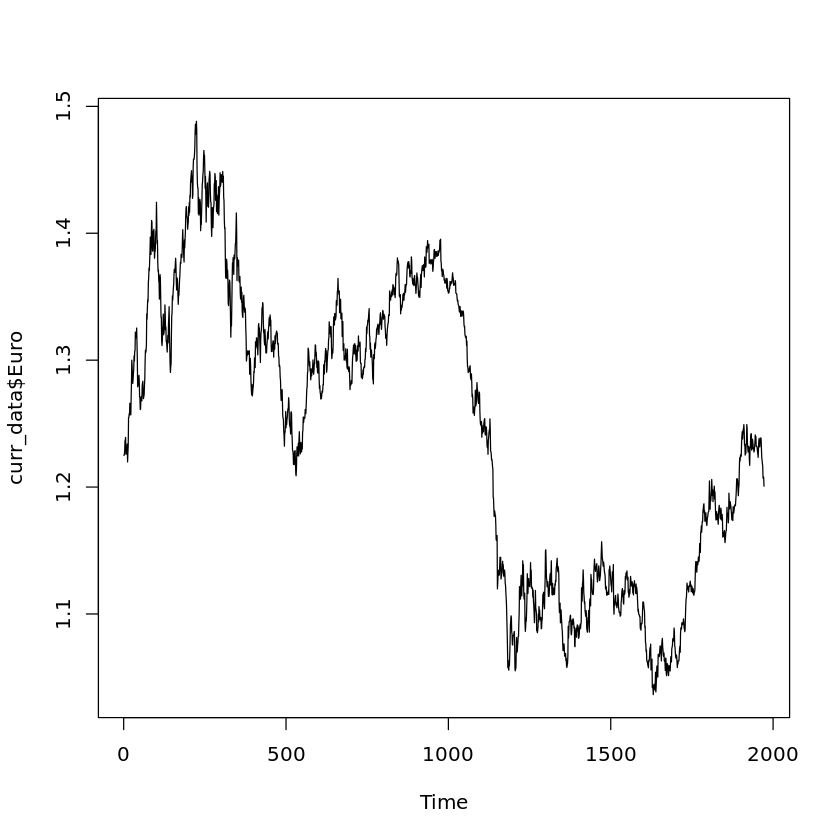

In [7]:
plot.ts(curr_data$Euro)

In [8]:
length(curr_data$Euro)

[1] 1972

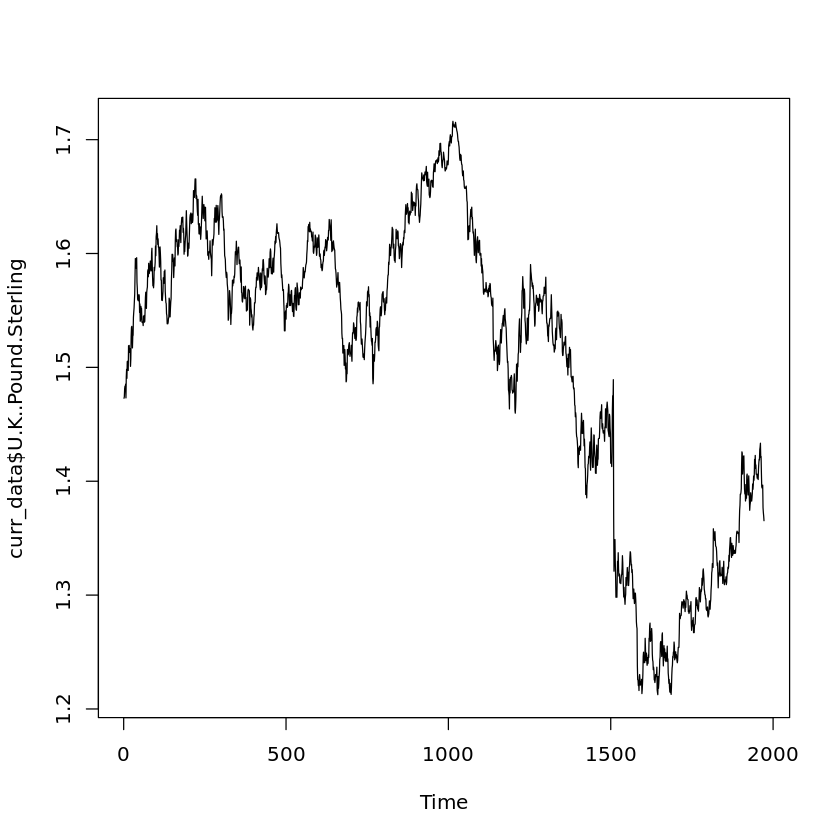

In [9]:
plot.ts(curr_data$U.K..Pound.Sterling)

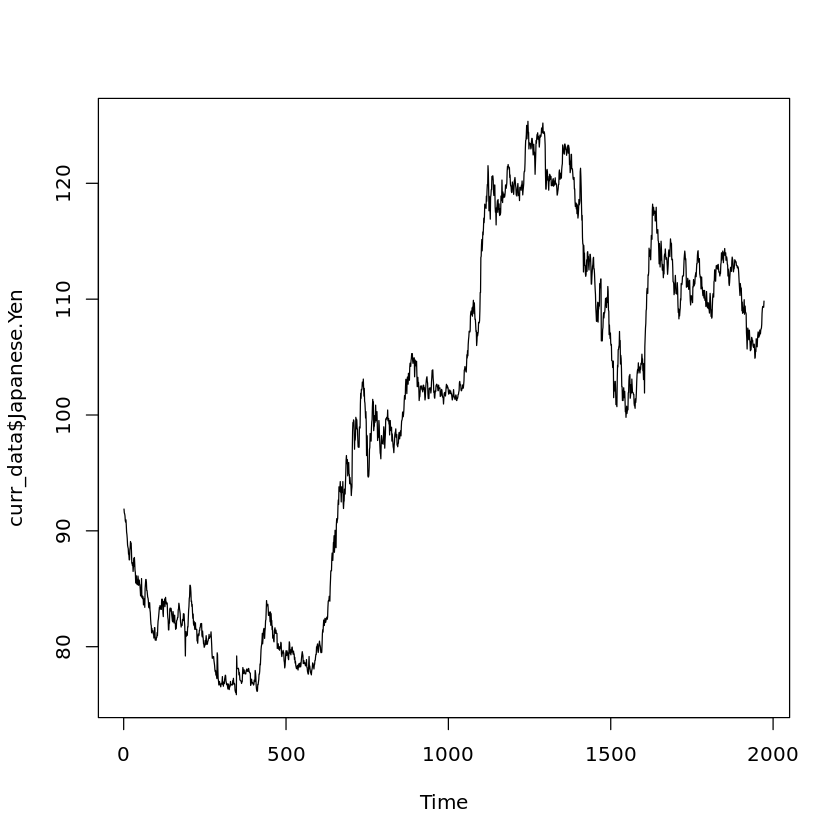

In [10]:
plot.ts(curr_data$Japanese.Yen)

In [11]:
set.seed(1)
training.samples <- createDataPartition(curr_data$Euro, p = 0.9, list = FALSE)
train.data  <- curr_data[training.samples, ]
test.data <- curr_data[-training.samples, ]

x <- model.matrix(Euro~., train.data)[,-1]
y <- as.double(train.data$Euro)
x.test <- model.matrix(Euro ~., test.data)[,-1]

In [12]:
lambdas_to_try <- 10^seq(-20, 3, length.out = 100)
set.seed(1) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)

In [13]:
coef(cv.lasso)

51 x 1 sparse Matrix of class "dgCMatrix"
                                       1
(Intercept)                 2.424667e+00
Algerian.Dinar              3.109153e-06
Australian.Dollar           3.227952e-03
Bahrain.Dinar               .           
Bolivar.Fuerte              7.989864e-08
Botswana.Pula               7.676351e-03
Brazilian.Real              1.299838e-04
Brunei.Dollar               .           
Canadian.Dollar             4.584666e-02
Chilean.Peso               -2.368790e-05
Chinese.Yuan                9.057855e-03
Colombian.Peso              .           
Czech.Koruna               -1.375481e-03
Danish.Krone               -1.615731e-01
Hungarian.Forint           -4.464199e-04
Icelandic.Krona             4.336704e-05
Indian.Rupee                1.016042e-04
Indonesian.Rupiah          -2.898139e-08
Iranian.Rial                1.398005e-07
Israeli.New.Sheqel         -1.653028e-02
Japanese.Yen                4.453444e-04
Kazakhstani.Tenge          -2.148597e-06
Korean.Won     

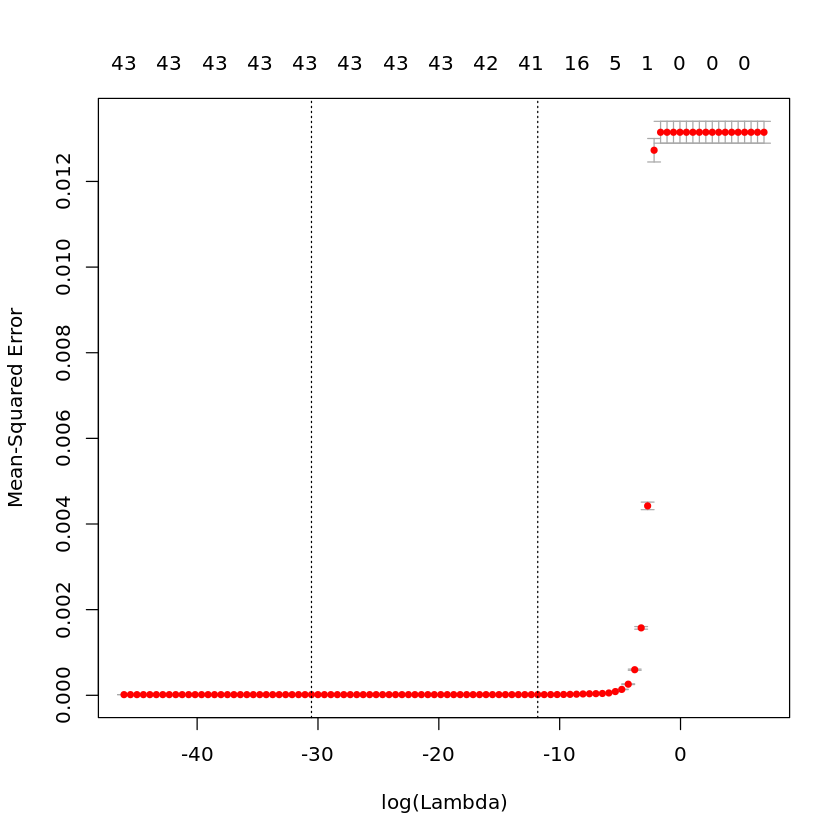

In [14]:
plot(cv.lasso)

In [15]:
cv.lasso$lambda.min

[1] 5.462277e-14

In [16]:
cv.lasso$lambda.1se

[1] 7.390722e-06

In [17]:
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)

In [18]:
lambdas_to_try <- 10^seq(-20, 3, length.out = 100)
set.seed(1)
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 5)

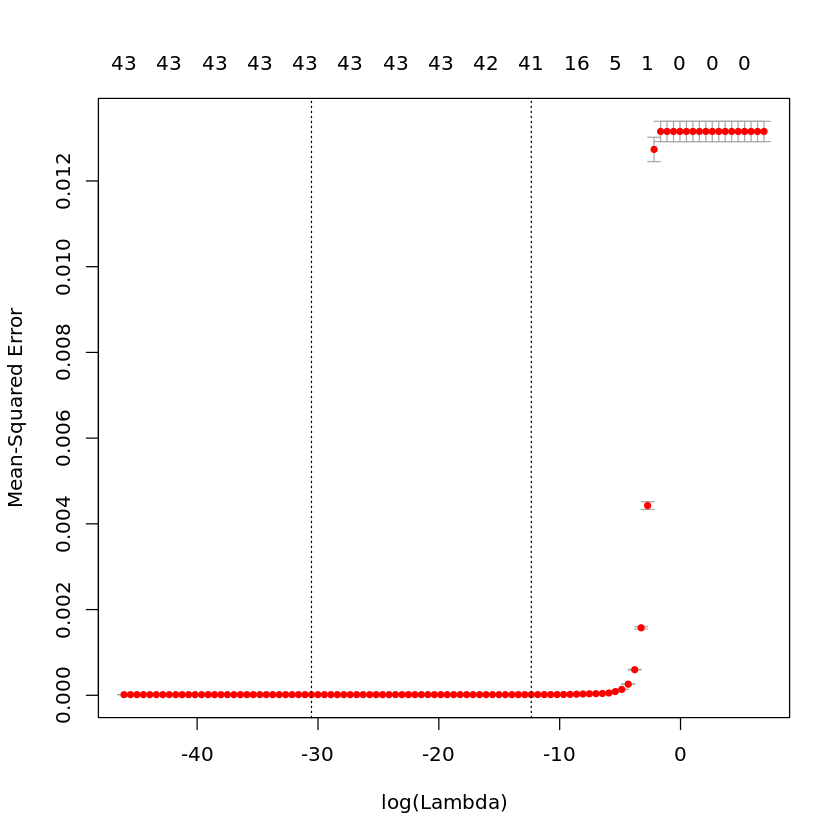

In [19]:
plot(cv.lasso)

In [20]:
cv.lasso$lambda.min

[1] 5.462277e-14

In [21]:
cv.lasso$lambda.1se

[1] 4.328761e-06

In [22]:
# Fit the final model on the training data
model_5_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_5 = predict(model_5_nfolds, newx = x.test)

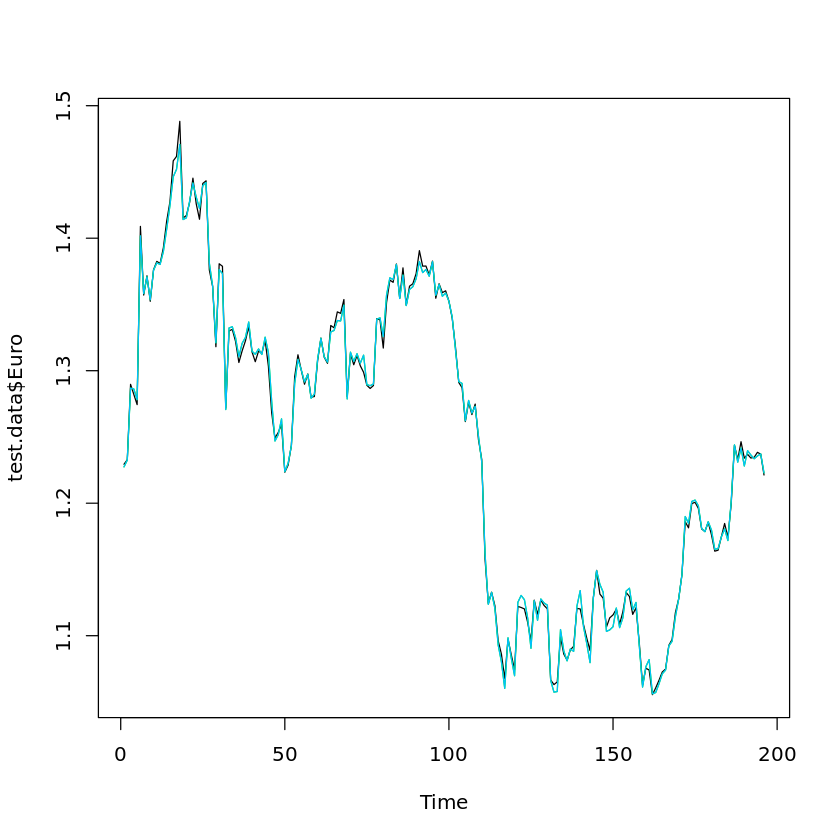

In [23]:
plot.ts(test.data$Euro)
lines(pred_5, col="green")
lines(pred_10, col="deepskyblue")

In [24]:
mean((test.data$Euro - pred_5)^2)

[1] 1.697e-05

In [25]:
mean((test.data$Euro - pred_10)^2)

[1] 1.697e-05